# Guía Ciudadana

El siguiente es el código para bajar los archivos para el ejercicio.

In [2]:
source("Import Files.R", echo = T)


> library(readxl)

> library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




> temp <- tempfile(fileext = ".zip")

> download.file("https://drive.google.com/uc?authuser=0&id=1qjbm1rmLRf9jnjox1ZhO-ftkOkvKy1UH&export=download", 
+     temp)

> out <- unzip(temp, exdir = tempdir())

> Adj_2018 <- read_excel(out[3])

> Adj_2019 <- read_excel(out[4])

> Adj_2015 <- read_excel(out[5])

> Adj_2016 <- read_excel(out[6])

> Adj_2017 <- read_excel(out[7])

> Of_2015 <- read_excel(out[8])

> Of_2016 <- read_excel(out[9])

> Of_2017 <- read_excel(out[10])

> Of_2018_19 <- read_excel(out[11])

> SIAC_18_19 <- read_excel(out[1])

> SIAC_15_17 <- read_excel(out[12])

> SIAC_18_19$`Año de adjudicación` <- as.numeric(SIAC_18_19$`Año de adjudicación`)

> Adj_Total <- bind_rows(Adj_2015, Adj_2016, Adj_2017, 
+     Adj_2018, Adj_2019)

> Of_Total <- bind_rows(Of_2015, Of_2016, Of_2017, Of_2018_19)

> SIAC_Total <- bind_rows(SIAC_15_17, SIAC_18_19)


Análisis exploratorio Instituciones

Para entender los datos que tenemos, podemos empezar por ver cuales son las instituciones que mas adjudican. Para empezar, haremos un análisis exploratorio con un Pareto. Para simplificar la interpretación, Hemos desarrollado un Alias para cada institución. El siguiente código importa una tabla con el Alias para incorporarlo al análisis. 

In [12]:
library(ggplot2)
library(stringr)
library(gridExtra)
temp <- tempfile(fileext = ".xlsx")
download.file("https://drive.google.com/uc?authuser=0&id=1Kl6--5GnckLUWQzUwGOZ96fHFxS0cyGB&export=download",temp)
Instituciones <- read_excel(temp, sheet = "Inst. Publicas")
download.file("https://drive.google.com/uc?authuser=0&id=1dCiQv_uAsTmoHkPlMgvwTXDtXlbG6SwY&export=download",temp)
Proveedores <- read_excel(temp)


Podemos ahora generar una tabla para entender la cantidad adjudicada por cada institución entre 2015 y el 2019, usando el Alias para identificar las instituciones.

In [8]:
AdjI <- Adj_Total %>% group_by(INSTITUCION, CED_INSTITUCION) %>%
  summarise(Monto = sum(MONTO_ADJUDICADO), n = n()) %>%
  arrange(desc(Monto)) %>%
  left_join(Instituciones, by = "CED_INSTITUCION") %>%
  select(INSTITUCION, CED_INSTITUCION, Monto,  Alias)

AdjI$Monto_Acumulado <- cumsum(AdjI$Monto)
AdjI$Alias <- factor(AdjI$Alias, levels=AdjI$Alias)

Una vez echo esto, podemos ahora generar graficos de Pareto para entender mejor los datos.

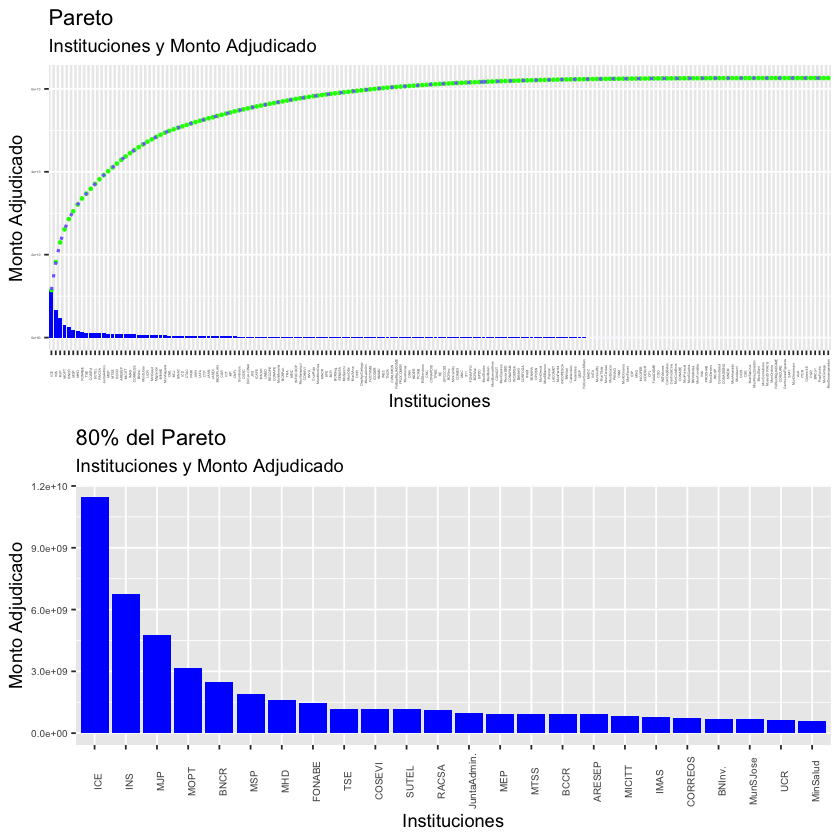

In [9]:
AIM <- ggplot(AdjI, aes(x=AdjI$Alias)) + 
  geom_bar(aes(y=AdjI$Monto), fill='blue', stat="identity") +
  geom_point(aes(y=AdjI$Monto_Acumulado), color = rgb(0, 1, 0), pch=16, size=1) +
  geom_path(aes(y=AdjI$Monto_Acumulado, group=1), colour="slateblue1", lty=3, size=0.9) +
  theme(axis.text.x = element_text(angle=90, vjust=0.6), axis.text=element_text(size=2)) +
  labs(title = "Pareto", subtitle = "Instituciones y Monto Adjudicado", x = 'Instituciones', y = 'Monto Adjudicado') 
#  theme(axis.text.x = element_blank())

AdjI_filt <- AdjI %>%
  filter(Monto_Acumulado< 4.8e+10)
           
AIM_Filt <- ggplot(AdjI_filt, aes(x=AdjI_filt$Alias)) + 
  geom_bar(aes(y=AdjI_filt$Monto), fill='blue', stat="identity") +
  theme(axis.text.x = element_text(angle=90), axis.text=element_text(size=6)) +
  labs(title = "80% del Pareto", subtitle = "Instituciones y Monto Adjudicado", x = 'Instituciones', y = 'Monto Adjudicado') 
grid.arrange(AIM, AIM_Filt, nrow = 2)

Análisis Exploratorio Proveedores (2015-2019)

Ahora podemos ver los proveedores que mas adjudicaron en este periodo.

Para entender los datos que tenemos, podemos empezar por ver cuales son los proveedores que mas adjudican. Para empezar, haremos un análisis exploratorio con un Pareto.

In [13]:
AdjP <- Adj_Total %>% group_by(NOMBRE_PROVEEDOR, CEDULA_PROVEEDOR) %>%
  summarise(Monto = sum(MONTO_ADJUDICADO), n = n()) %>%
  arrange(desc(Monto)) %>%
  left_join(Proveedores, by = "CEDULA_PROVEEDOR") %>%
  select(NOMBRE_PROVEEDOR, CEDULA_PROVEEDOR, Monto, `Nombre Comercial`)
AdjP$Nombre <- ifelse(is.na(AdjP$`Nombre Comercial`), AdjP$NOMBRE_PROVEEDOR, AdjP$`Nombre Comercial`)

AdjP$Monto_Acumulado <- cumsum(AdjP$Monto)
AdjP$Nombre[521] <- "SONDA2"
AdjP$Nombre <- factor(AdjP$Nombre, levels=AdjP$Nombre)

Una vez echo esto, podemos ahora generar graficos de Pareto para entender mejor los datos.

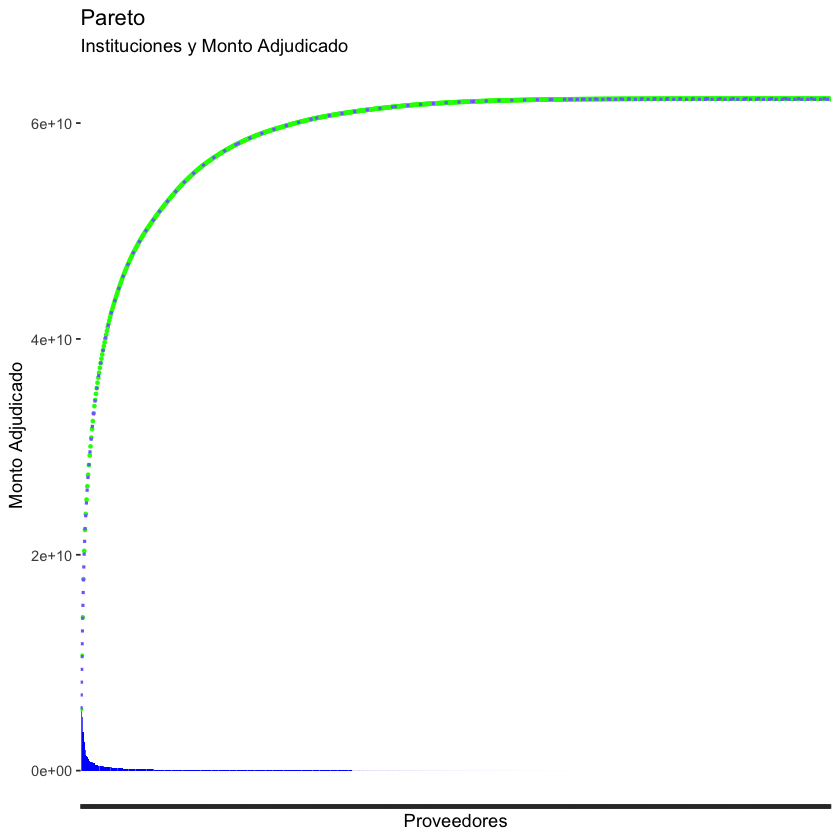

In [14]:
APM <- ggplot(AdjP, aes(x=AdjP$Nombre)) + 
  geom_bar(aes(y=AdjP$Monto), fill='blue', stat="identity") +
  geom_point(aes(y=AdjP$Monto_Acumulado), color = rgb(0, 1, 0), pch=16, size=1) +
  geom_path(aes(y=AdjP$Monto_Acumulado, group=1), colour="slateblue1", lty=3, size=0.9) +
  theme(axis.text.x = element_text(angle=90, vjust=0.6)) +
  labs(title = "Pareto", subtitle = "Instituciones y Monto Adjudicado", x = 'Proveedores', y = 'Monto Adjudicado') +
  theme(axis.text.x = element_blank())
APM

En el pareto podemos observar que el mercado esta más disperso el monto de adjudicaciones que entre las instituciones oferentes. Debido a la mayor disperción, en vez del 80%, visualizaremos que empresas obtuvieron el 70% de todo lo adjuticado según el monto. En este caso no se ha generado el Alias para la empresa, visualizarlo en un gráfico no es to mejor por el momento.

In [16]:
AdjP_filt <- AdjP %>%
  filter(Monto_Acumulado<AdjP$Monto_Acumulado[957]*.7) %>%
  select(NOMBRE_PROVEEDOR, Monto, Monto_Acumulado)
AdjP_filt

NOMBRE_PROVEEDOR,Monto,Monto_Acumulado
GBM DE COSTA RICA SOCIEDAD ANONIMA,5675607760,5675607760
NORTEC CONSULTING SOCIEDAD ANONIMA,4965823938,10641431698
DATA TELL TRES MIL DE COSTA RICA SOCIEDAD ANONIMA,3562981748,14204413446
SEFISA SISTEMAS EFICIENTES SOCIEDAD ANONIMA,3539402678,17743816125
EMPRESA DE SERVICIOS PUBLICOS DE HEREDIA SOCIEDAD ANONIMA,2621514397,20365330522
PRODUCTIVE BUSINESS SOLUTIONS COSTA RICA SOCIEDAD ANONIMA,1934347156,22299677677
CONSULTING GROUP CORPORACION LATINOAMERICANA SOCIEDAD ANONIMA,1484157749,23783835426
HOLST VAN PATTEN SOCIEDAD ANONIMA,1331714155,25115549581
IT Servicios de Infocomunicación S.A.,1232888981,26348438563
ARRENDADORA COMERCIAL R,1069612108,27418050671


las instituciones que NO están en SICOP no manejan un código de mercancías uniforme, por lo que no se puede obtener un reporte con códigos de técnologia.

Sin embargo en el SIAC si se manejan las subpartidas presupuestarias, las cuales, pese a que abarcan más bienes y servicios que los desados, señalan los códigos de técnologia en el SICOP, es la mejor aproximación que podría realizarse. 

Las siguientes subpartidas se utilizaron para aproximarse a las compras tecnológicas del estado utilizando el SIAC:

* 1.01.03-- Alquiler de equipo de cómputo
* 1.01.04-- Alquiller de equipo y derechos para telecomunicaciones 
* 1.03.07-- Servicios de transferencia electrónica de información//(2019) Servicios de tecnologías de información 
* 1.04.03-- Servicios de ingeniería y arquitectura 
* 1.04.05-- Servicios de desarrollo de sistemas informáticos //(2019) Servicios informáticos
* 1.04.99--Otros servicios de gestión y apoyo
* 1.08.08--Mantenimiento y reparación de equipo de cómputo y sistemas de información
* 2.03.04--Materiales y productos eléctronicos, telefónicos y de cómputo
* 2.99.01--Útiles y materiales de oficina y cómputo
* 5.01.03--Equipo de comunicación
* 5.01.05-- Equipo y programas de cómputo//(2019) Equipo de cómputo
* 5.99.03--Bienes intangibles


El siguiente código genera las clasificaciones de tecnología. El código requiere de niveles de procesamiento mas grandes que los disponible en esta plataforma. Para verificar el código, puede bajarlo y correrlo con mas procesamiento. 

In [10]:
#setwd("./Text Mining")
#source("SIAC_Tech.R", echo = T)
#setwd('..')